## **Data Science and Equality**

This is dataset from Kaggle contains information from a survey done in the data science community in 2018. We'd like to explore the impact of gender on income in the data science industry.

In [161]:
!pip3 install lightgbm
from lightgbm import LGBMClassifier
from lightgbm import plot_importance
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler


In [163]:
df = pd.read_csv('C:/Users/chris/Downloads/multipleChoiceResponses.csv/multipleChoiceResponses.csv')
df.shape


(23860, 395)

In [164]:
df.head()

,Time from Start to Finish (seconds),Q1,Q1_OTHER_TEXT,Q2,Q3,Q4,Q5,Q6,Q6_OTHER_TEXT,Q7,...,Q49_OTHER_TEXT,Q50_Part_1,Q50_Part_2,Q50_Part_3,Q50_Part_4,Q50_Part_5,Q50_Part_6,Q50_Part_7,Q50_Part_8,Q50_OTHER_TEXT
0,Duration (in seconds),What is your gender? - Selected Choice,What is your gender? - Prefer to self-describe...,What is your age (# years)?,In which country do you currently reside?,What is the highest level of formal education ...,Which best describes your undergraduate major?...,Select the title most similar to your current ...,Select the title most similar to your current ...,In what industry is your current employer/cont...,...,What tools and methods do you use to make your...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...
1,710,Female,-1,45-49,United States of America,Doctoral degree,Other,Consultant,-1,Other,...,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
2,434,Male,-1,30-34,Indonesia,Bachelor’s degree,Engineering (non-computer focused),Other,0,Manufacturing/Fabrication,...,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
3,718,Female,-1,30-34,United States of America,Master’s degree,"Computer science (software engineering, etc.)",Data Scientist,-1,I am a student,...,-1,NaN,Too time-consuming,NaN,NaN,NaN,NaN,NaN,NaN,-1
4,621,Male,-1,35-39,United States of America,Master’s degree,"Social sciences (anthropology, psychology, soc...",Not employed,-1,NaN,...,-1,NaN,NaN,Requires too much technical knowledge,NaN,Not enough incentives to share my work,NaN,NaN,NaN,-1


In [165]:
questions = df.iloc[0]
questions.head(15)

Time from Start to Finish (seconds)                                Duration (in seconds)
Q1                                                What is your gender? - Selected Choice
Q1_OTHER_TEXT                          What is your gender? - Prefer to self-describe...
Q2                                                           What is your age (# years)?
Q3                                             In which country do you currently reside?
Q4                                     What is the highest level of formal education ...
Q5                                     Which best describes your undergraduate major?...
Q6                                     Select the title most similar to your current ...
Q6_OTHER_TEXT                          Select the title most similar to your current ...
Q7                                     In what industry is your current employer/cont...
Q7_OTHER_TEXT                          In what industry is your current employer/cont...
Q8                   

In [135]:
answers = df.drop(0, axis=0)

In [166]:
df_short = answers[['Q1', 'Q2', 'Q3', 'Q4', 'Q5','Q6', 'Q7', 'Q8', 'Q9']]
df_short=df_short.rename(columns= {'Q1': 'Gender', 'Q2': 'Age','Q1': 'Gender', 'Q3': 'Country','Q4': 'Education', 'Q5': 'Major',
                                  'Q6': 'Job', 'Q7': 'Industry','Q8': 'Experience', 'Q9': 'Salary'})



## Missing Values

In [167]:
df_short.fillna('Unknown', inplace = True)

In [168]:
df_short['Salary'].value_counts()

I do not wish to disclose my approximate yearly compensation    4756
0-10,000                                                        4398
Unknown                                                         3674
10-20,000                                                       1937
20-30,000                                                       1395
30-40,000                                                       1119
40-50,000                                                        965
50-60,000                                                        919
100-125,000                                                      843
60-70,000                                                        729
70-80,000                                                        677
90-100,000                                                       566
125-150,000                                                      533
80-90,000                                                        506
150-200,000                       

## Drop Rows

In [169]:
df_short=df_short[(df_short['Salary'] != 'I do not wish to disclose my approximate yearly compensation') &
 (df_short['Salary'] != 'Unknown')]
df_short['Salary'].value_counts

<bound method IndexOpsMixin.value_counts of 2          10-20,000
3           0-10,000
5           0-10,000
7          10-20,000
8           0-10,000
            ...     
23844     90-100,000
23845       0-10,000
23854      10-20,000
23855    250-300,000
23857      10-20,000
Name: Salary, Length: 15429, dtype: object>

In [170]:
df_short.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15429 entries, 2 to 23857
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Gender      15429 non-null  object
 1   Age         15429 non-null  object
 2   Country     15429 non-null  object
 3   Education   15429 non-null  object
 4   Major       15429 non-null  object
 5   Job         15429 non-null  object
 6   Industry    15429 non-null  object
 7   Experience  15429 non-null  object
 8   Salary      15429 non-null  object
dtypes: object(9)
memory usage: 1.2+ MB


In [171]:
df_short['Age'].unique()

array(['30-34', '22-24', '35-39', '18-21', '40-44', '25-29', '55-59',
       '60-69', '45-49', '50-54', '80+', '70-79'], dtype=object)

In [172]:
df_short['Experience'].unique()

array(['5-10', '0-1', '10-15', '3-4', 'Unknown', '1-2', '2-3', '15-20',
       '4-5', '25-30', '20-25', '30 +'], dtype=object)

## Data Types

In [173]:
age_dict = {'30-34': 32, '22-24': 23, '35-39':37, '18-21':19.5, '40-44':42, '25-29':27, '55-59':57,
            '60-69':65, '45-49':47, '50-54':52, '80+': 80, '70-79':75}
exp_dict = {'5-10':7, '0-1':0.5, '10-15': 12.5, '3-4': 3.5, 'Unknown': 0, '1-2' : 1.5, '2-3': 2.5, '15-20': 17.5,
       '4-5': 4.5, '25-30': 27.5, '20-25': 22.5, '30 +': 30}
df_short['Age'] = df_short['Age'].apply(lambda x: age_dict[x])
df_short['Experience'] = df_short['Experience'].apply(lambda x: exp_dict[x])
df_short[['Experience', 'Age']].head()

,Experience,Age
2,7.0,32.0
3,0.5,32.0
5,0.5,23.0
7,12.5,37.0
8,0.5,19.5


In [174]:
df_short.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15429 entries, 2 to 23857
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gender      15429 non-null  object 
 1   Age         15429 non-null  float64
 2   Country     15429 non-null  object 
 3   Education   15429 non-null  object 
 4   Major       15429 non-null  object 
 5   Job         15429 non-null  object 
 6   Industry    15429 non-null  object 
 7   Experience  15429 non-null  float64
 8   Salary      15429 non-null  object 
dtypes: float64(2), object(7)
memory usage: 1.2+ MB


## Prepare Data

In [175]:
labels_col = 'Salary'
Y = df_short[labels_col]
X = df_short.drop(columns = [labels_col], axis=1)


In [176]:
X[['Age','Experience']]= StandardScaler().fit_transform(X[['Age','Experience']])
X.head()

,Gender,Age,Country,Education,Major,Job,Industry,Experience
2,Male,0.108636,Indonesia,Bachelor’s degree,Engineering (non-computer focused),Other,Manufacturing/Fabrication,0.388361
3,Female,0.108636,United States of America,Master’s degree,"Computer science (software engineering, etc.)",Data Scientist,I am a student,-0.721494
5,Male,-0.838190,India,Master’s degree,Mathematics or statistics,Data Analyst,I am a student,-0.721494
7,Male,0.634650,Chile,Doctoral degree,"Information technology, networking, or system ...",Other,Academics/Education,1.327469
8,Male,-1.206400,India,Master’s degree,"Information technology, networking, or system ...",Other,Other,-0.721494


In [177]:
cat_variables = ["Gender","Age","Country","Education","Major","Job","Industry"]
for col in cat_variables:
    X[col] = X[col].astype('category')
X[cat_variables] = X[cat_variables].apply(lambda x: x.cat.codes)

In [178]:
X.head()

,Gender,Age,Country,Education,Major,Job,Industry,Experience
2,1,3,22,0,2,11,9,0.388361
3,0,3,56,3,1,7,7,-0.721494
5,1,1,21,3,8,4,7,-0.721494
7,1,4,8,1,7,11,0,1.327469
8,1,0,21,3,7,11,16,-0.721494


## Machine Learning

In [179]:
model=LGBMClassifier()
model.fit(X,Y)

LGBMClassifier()

<function matplotlib.pyplot.show(close=None, block=None)>

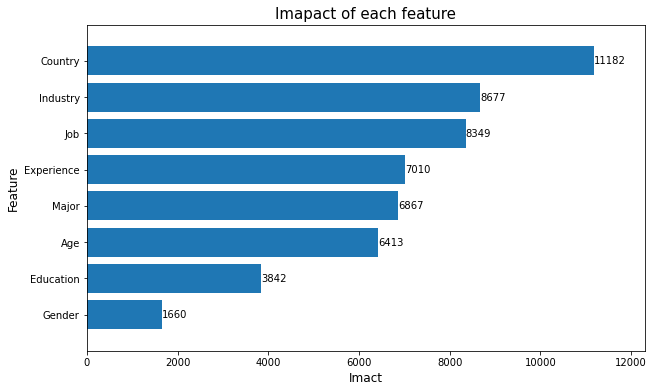

In [185]:
fig, ax = plt.subplots(figsize=(10,6))
plot_importance(model, max_num_features = 50, height = 0.8, ax=ax)
ax.grid(False)
plt.ylabel('Feature', size=12)
plt.xlabel('Imact', size=12)
plt.title ("Imapact of each feature", fontsize = 15)
plt.show

So it appears, that gender is not be a major contributing factor to the predicted compostion of income. But there is likely a correlation between gender and other features, like for example the job title, which might distort the result. 

## Relationship between Manager position and gender

In [180]:
df_manager= df_short.groupby(['Job','Gender']).count()
df_manager= df_manager.loc['Manager']
df_manager= df_manager.loc[['Female', 'Male']]['Age'].to_frame()
df_manager.rename(columns={"Age": "Manger"}, inplace = True)
df_manager= df_manager.reset_index()
df_manager

,Gender,Manger
0,Female,28
1,Male,418


## Bar Plot


<AxesSubplot:xlabel='Gender', ylabel='Manger'>

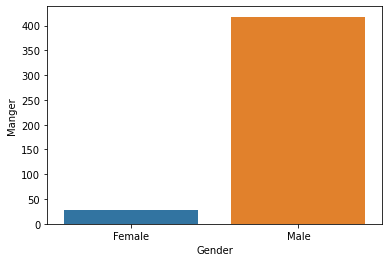

In [183]:
sns.barplot(x=df_manager['Gender'], y=df_manager['Manger']) 

As expected, a lot more males are in higher paid managing position, which is not reflected in the impact of the gender feature.